# Census and Density Analysis 
* What percentage changes 
* Parking Questions
* Others? 

In [111]:
import pandas as pd
import geopandas as gpd
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
neighborhoods = gpd.read_file('../data/la-county-neighborhoods-current.geojson')

In [13]:
from util import get_dataframe, get_data
census_prefix = '14000US'

In [4]:
# Parse the shapes from Sasha's map

import json
import shapely.geometry

# convert the shapes used by the webapp to shapely shapes
def webappToShape (shp):
    return shapely.geometry.shape({
        'type': 'MultiPolygon',
        'coordinates': [[[[ll['lng'], ll['lat']] for ll in poly]] for poly in shp]
    })

# Load SB 827 data
with open('../../upzone-california/data/low_rise_shape.json') as lowRiseFd:
    lowRise = webappToShape(json.load(lowRiseFd))

with open('../../upzone-california/data/high_rise_shape.json') as highRiseFd:
    highRise = webappToShape(json.load(highRiseFd)).buffer(1e-8)

affectedArea = lowRise.union(highRise)


In [5]:
census_tracts = gpd.read_file('../data/census-tracts-2012.geojson')
census_tracts

,kind,external_id,name,slug,set,metadata,resource_uri,geometry
0,Census Tract (2012),06037101110,06037101110,06037101110-census-tract-2012,/1.0/boundary-set/census-tracts-2012/,"{'INTPTLAT': '+34.2594737', 'NAME': '1011.10',...",/1.0/boundary/06037101110-census-tract-2012/,"(POLYGON ((-118.302291 34.258697, -118.300787 ..."
1,Census Tract (2012),06037101122,06037101122,06037101122-census-tract-2012,/1.0/boundary-set/census-tracts-2012/,"{'INTPTLAT': '+34.2677213', 'NAME': '1011.22',...",/1.0/boundary/06037101122-census-tract-2012/,"(POLYGON ((-118.303334 34.273536, -118.303178 ..."
2,Census Tract (2012),06037101210,06037101210,06037101210-census-tract-2012,/1.0/boundary-set/census-tracts-2012/,"{'INTPTLAT': '+34.2529724', 'NAME': '1012.10',...",/1.0/boundary/06037101210-census-tract-2012/,"(POLYGON ((-118.299451 34.255978, -118.285924 ..."
3,Census Tract (2012),06037101220,06037101220,06037101220-census-tract-2012,/1.0/boundary-set/census-tracts-2012/,"{'INTPTLAT': '+34.2516085', 'NAME': '1012.20',...",/1.0/boundary/06037101220-census-tract-2012/,"(POLYGON ((-118.285924 34.248959, -118.285924 ..."
4,Census Tract (2012),06037101300,06037101300,06037101300-census-tract-2012,/1.0/boundary-set/census-tracts-2012/,"{'INTPTLAT': '+34.2487732', 'NAME': '1013', 'I...",/1.0/boundary/06037101300-census-tract-2012/,"(POLYGON ((-118.272473 34.232527, -118.271936 ..."
5,Census Tract (2012),06037101400,06037101400,06037101400-census-tract-2012,/1.0/boundary-set/census-tracts-2012/,"{'INTPTLAT': '+34.2428521', 'NAME': '1014', 'I...",/1.0/boundary/06037101400-census-tract-2012/,"(POLYGON ((-118.321885 34.248039, -118.322382 ..."
6,Census Tract (2012),06037102103,06037102103,06037102103-census-tract-2012,/1.0/boundary-set/census-tracts-2012/,"{'INTPTLAT': '+34.2250792', 'NAME': '1021.03',...",/1.0/boundary/06037102103-census-tract-2012/,"(POLYGON ((-118.365326 34.228703, -118.350663 ..."
7,Census Tract (2012),06037102104,06037102104,06037102104-census-tract-2012,/1.0/boundary-set/census-tracts-2012/,"{'INTPTLAT': '+34.2161873', 'NAME': '1021.04',...",/1.0/boundary/06037102104-census-tract-2012/,"(POLYGON ((-118.356402 34.219607, -118.355623 ..."
8,Census Tract (2012),06037102105,06037102105,06037102105-census-tract-2012,/1.0/boundary-set/census-tracts-2012/,"{'INTPTLAT': '+34.2098760', 'NAME': '1021.05',...",/1.0/boundary/06037102105-census-tract-2012/,"(POLYGON ((-118.353092 34.208528, -118.35306 3..."
9,Census Tract (2012),06037102107,06037102107,06037102107-census-tract-2012,/1.0/boundary-set/census-tracts-2012/,"{'INTPTLAT': '+34.2409055', 'NAME': '1021.07',...",/1.0/boundary/06037102107-census-tract-2012/,"(POLYGON ((-118.366843 34.232359, -118.367879 ..."


In [6]:
joined = gpd.sjoin(census_tracts, neighborhoods, how='inner', op='within')

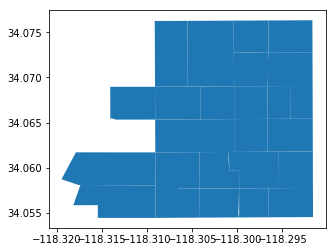

In [7]:
ktown = joined[joined['external_id_right'] == 'koreatown']
ktown.plot()

In [8]:
ktown['external_id_left'] 

580    06037211201
581    06037211202
582    06037211310
583    06037211320
584    06037211410
585    06037211420
588    06037211703
590    06037211802
591    06037211803
592    06037211804
593    06037211910
594    06037211921
595    06037211922
596    06037212101
597    06037212102
601    06037212303
602    06037212304
603    06037212305
604    06037212306
605    06037212410
606    06037212420
607    06037212501
608    06037212502
609    06037212610
610    06037212620
Name: external_id_left, dtype: object

In [87]:
ktown_data = get_dataframe(tables=['B08301'],
                           geoids=list(ktown['external_id_left'].apply(lambda x: census_prefix + x )), 
                           col_names=True)
ktown_data.head()

,Total:,"Car, truck, or van:",Drove alone,Carpooled:,In 2-person carpool,In 3-person carpool,In 4-person carpool,In 5- or 6-person carpool,In 7-or-more-person carpool,Public transportation (excluding taxicab):,...,Streetcar or trolley car (carro publico in Puerto Rico),Subway or elevated,Railroad,Ferryboat,Taxicab,Motorcycle,Bicycle,Walked,Other means,Worked at home
14000US06037211201,1692.0,1086.0,909.0,177.0,172.0,5.0,0.0,0.0,0.0,460.0,...,0.0,20.0,0.0,0.0,0.0,8.0,36.0,50.0,8.0,44.0
14000US06037211202,1392.0,771.0,698.0,73.0,45.0,28.0,0.0,0.0,0.0,492.0,...,0.0,81.0,0.0,0.0,0.0,0.0,10.0,34.0,0.0,85.0
14000US06037211310,2041.0,1205.0,1102.0,103.0,103.0,0.0,0.0,0.0,0.0,693.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37.0,17.0,89.0
14000US06037211320,1600.0,835.0,775.0,60.0,60.0,0.0,0.0,0.0,0.0,569.0,...,0.0,55.0,0.0,0.0,0.0,0.0,35.0,67.0,0.0,94.0
14000US06037211410,1347.0,932.0,845.0,87.0,87.0,0.0,0.0,0.0,0.0,241.0,...,0.0,7.0,0.0,0.0,0.0,0.0,7.0,36.0,8.0,123.0


## Relationship between affected Area and Means of Transportation to work

In [11]:
affected_tracts = census_tracts[census_tracts.intersects(affectedArea)]
affected_tracts.head()

,kind,external_id,name,slug,set,metadata,resource_uri,geometry
index_left,,,,,,,,
0,Census Tract (2012),06037101110,06037101110,06037101110-census-tract-2012,/1.0/boundary-set/census-tracts-2012/,"{'INTPTLAT': '+34.2594737', 'NAME': '1011.10',...",/1.0/boundary/06037101110-census-tract-2012/,"(POLYGON ((-118.302291 34.258697, -118.300787 ..."
2,Census Tract (2012),06037101210,06037101210,06037101210-census-tract-2012,/1.0/boundary-set/census-tracts-2012/,"{'INTPTLAT': '+34.2529724', 'NAME': '1012.10',...",/1.0/boundary/06037101210-census-tract-2012/,"(POLYGON ((-118.299451 34.255978, -118.285924 ..."
3,Census Tract (2012),06037101220,06037101220,06037101220-census-tract-2012,/1.0/boundary-set/census-tracts-2012/,"{'INTPTLAT': '+34.2516085', 'NAME': '1012.20',...",/1.0/boundary/06037101220-census-tract-2012/,"(POLYGON ((-118.285924 34.248959, -118.285924 ..."
4,Census Tract (2012),06037101300,06037101300,06037101300-census-tract-2012,/1.0/boundary-set/census-tracts-2012/,"{'INTPTLAT': '+34.2487732', 'NAME': '1013', 'I...",/1.0/boundary/06037101300-census-tract-2012/,"(POLYGON ((-118.272473 34.232527, -118.271936 ..."
5,Census Tract (2012),06037101400,06037101400,06037101400-census-tract-2012,/1.0/boundary-set/census-tracts-2012/,"{'INTPTLAT': '+34.2428521', 'NAME': '1014', 'I...",/1.0/boundary/06037101400-census-tract-2012/,"(POLYGON ((-118.321885 34.248039, -118.322382 ..."


In [21]:
lookup_list = list(affected_tracts['external_id'].apply(lambda x: census_prefix + x ))
lookup_list[:5]

['14000US06037101110',
 '14000US06037101210',
 '14000US06037101220',
 '14000US06037101300',
 '14000US06037101400']

In [51]:
raw_data = [get_dataframe(tables=['B08301'], geoids = [l],col_names=True) for l in lookup_list]

In [54]:
affected_tracts = pd.concat(raw_data)
affected_tracts.head()

,Total:,"Car, truck, or van:",Drove alone,Carpooled:,In 2-person carpool,In 3-person carpool,In 4-person carpool,In 5- or 6-person carpool,In 7-or-more-person carpool,Public transportation (excluding taxicab):,...,Streetcar or trolley car (carro publico in Puerto Rico),Subway or elevated,Railroad,Ferryboat,Taxicab,Motorcycle,Bicycle,Walked,Other means,Worked at home
14000US06037101110,2049.0,1897.0,1746.0,151.0,106.0,38.0,7.0,0.0,0.0,41.0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,10.0,32.0,69.0
14000US06037101210,2806.0,2361.0,2193.0,168.0,86.0,61.0,21.0,0.0,0.0,137.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,99.0,77.0,132.0
14000US06037101220,1355.0,1163.0,1044.0,119.0,72.0,7.0,0.0,0.0,40.0,38.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0,23.0,82.0
14000US06037101300,1957.0,1721.0,1636.0,85.0,65.0,0.0,5.0,15.0,0.0,49.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,187.0
14000US06037101400,1925.0,1764.0,1574.0,190.0,110.0,62.0,0.0,0.0,18.0,30.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0,8.0,91.0


In [96]:
la_county_stats = get_dataframe(tables=['B08301'], geoids = ['05000US06037'],col_names=True)
ca_stats = get_dataframe(tables=['B08301'], geoids = ['04000US06'],col_names=True)

In [60]:
import altair as alt

# Uncomment/run this line to enable Altair in JupyterLab/nteract:
alt.enable_mime_rendering()

In [89]:
affected_la_percent = (affected_tracts.sum() / affected_tracts['Total:'].sum())['Public transportation (excluding taxicab):']

In [90]:
all_la_percent = (la_county_stats.sum() / la_county_stats['Total:'].sum())['Public transportation (excluding taxicab):']

In [99]:
ktown_percent = (ktown_data.sum() / ktown_data['Total:'].sum())['Public transportation (excluding taxicab):']
ca_percent = (ca_stats.sum() / ca_stats['Total:'].sum())['Public transportation (excluding taxicab):']

In [104]:
percentage_pub_trans = pd.Series({'affected_la': affected_la_percent, 
                                  'all_la': all_la_percent,
                                  'ktown': ktown_percent,
                                  'ca': ca_percent})
percentage_pub_trans

affected_la    0.078338
all_la         0.060184
ca             0.050783
ktown          0.251322
dtype: float64

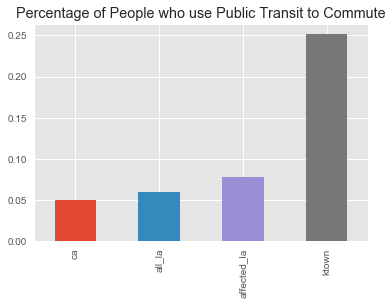

In [120]:
f =percentage_pub_trans.sort_values().plot(kind='bar',
                                        title="Percentage of People who use Public Transit to Commute")
fig = f.get_figure()

In [122]:
fig.savefig('./percentage_pub_trans.png')